In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
bs= pd.read_csv('Bike-Sharing.csv',parse_dates=['dteday'])
bs.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5468,5469,2011-08-20,3,0,8,18,0,6,0,1,0.76,0.7121,0.58,0.2537,169,225,394
14174,14175,2012-08-18,3,1,8,19,0,6,0,1,0.70,0.6364,0.45,0.1642,164,324,488
14684,14685,2012-09-09,3,1,9,1,0,0,0,1,0.56,0.5303,0.73,0.2239,20,104,124
1778,1779,2011-03-19,1,0,3,19,0,6,0,1,0.44,0.4394,0.33,0.2836,38,116,154
5464,5465,2011-08-20,3,0,8,14,0,6,0,1,0.80,0.7424,0.49,0.1940,147,228,375


instant: record index

dteday : date

season : season (1:winter, 2:spring, 3:summer, 4:fall)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not (extracted from [Web Link])

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

+ weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

In [3]:
bs.shape

(17379, 17)

In [4]:
# checking data type
bs.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [5]:
# checking null value
bs.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

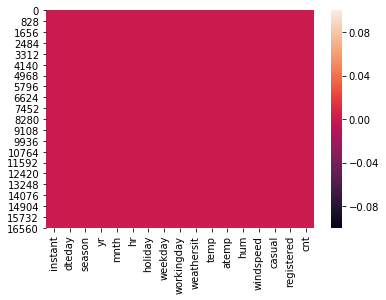

In [6]:
# heatmap of null value
sns.heatmap(bs.isnull())

In [7]:
# checking the data description
bs.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# corelation between coloums
bs.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


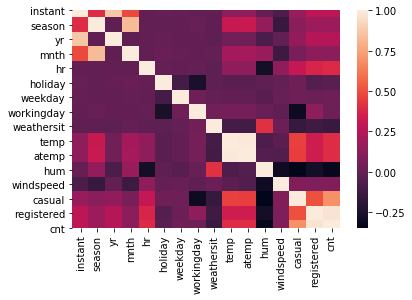

In [9]:
# heat map of corelation
sns.heatmap(bs.corr())

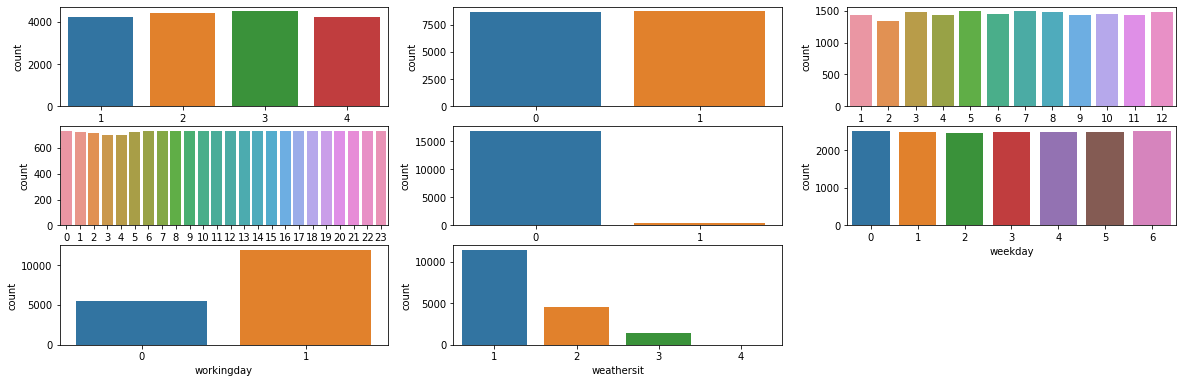

In [10]:
# creating bar plot of colums to check the count of indivisual value
count = bs[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','cnt']]
figure(num=None, figsize=(20,15))
for column_index, col in enumerate(count.columns):
    if col == 'cnt':
        continue
    plt.subplot(7, 3, column_index+1)
    sns.countplot(x=count[col],data=count)

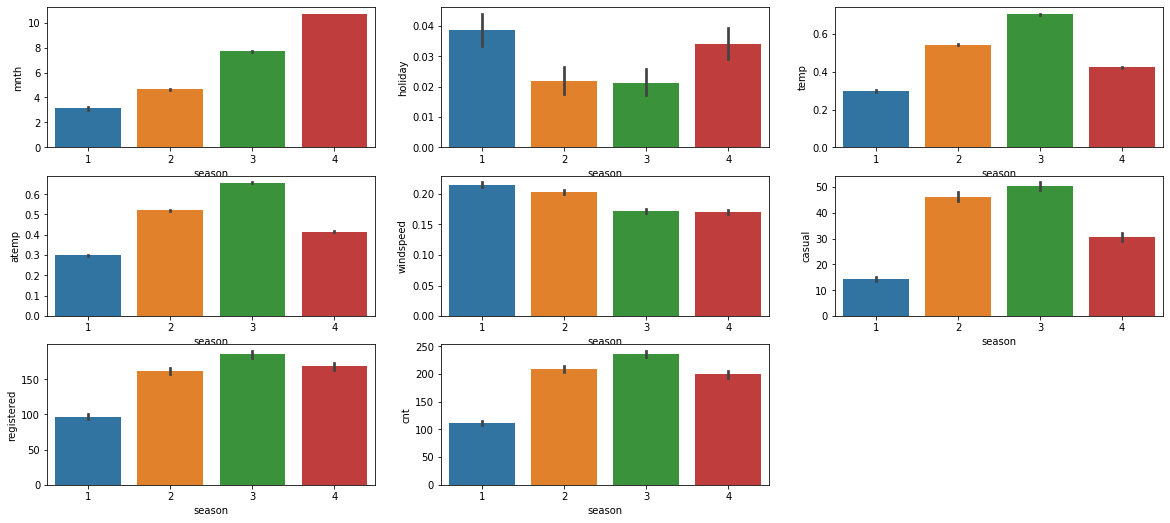

In [11]:
# creating bar plot of colums with respect to season to check distribution among season
season = bs[['season','mnth','holiday','temp','atemp','windspeed','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(season.columns):
    if column == 'season':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='season', y=column, data=season)

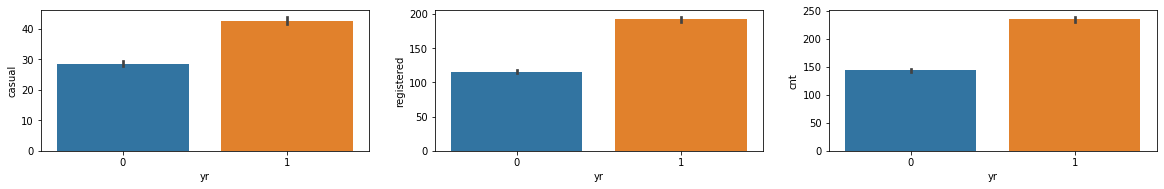

In [12]:
# creating bar plot of colums with respect to year to check distribution among year
yr = bs[['yr','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(yr.columns):
    if column == 'yr':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='yr', y=column, data=yr)

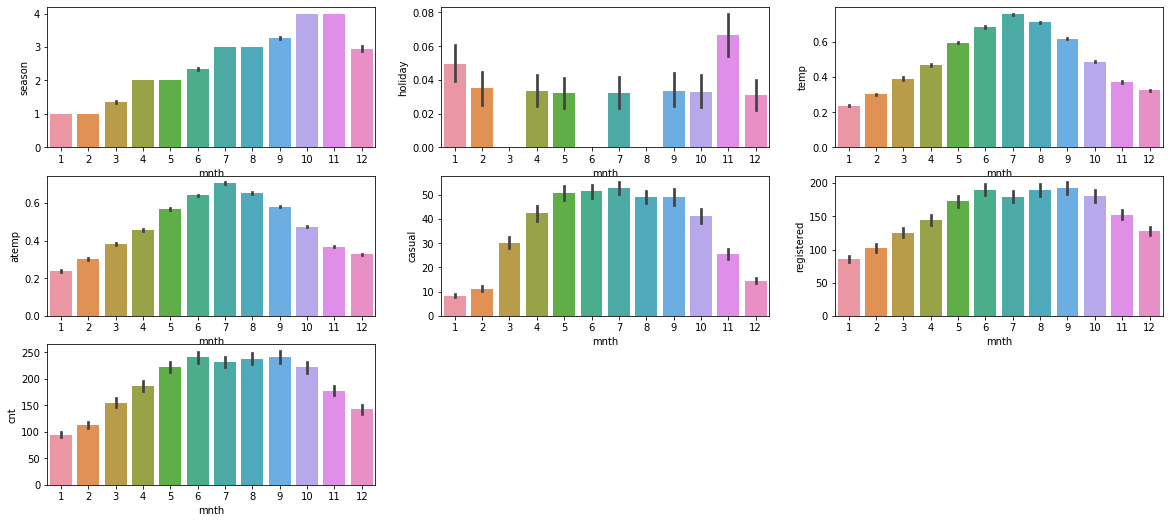

In [13]:
# creating bar plot of colums with respect to month to check distribution among month
mnth = bs[['mnth','season','holiday','temp','atemp','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(mnth.columns):
    if column == 'mnth':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='mnth', y=column, data=mnth)

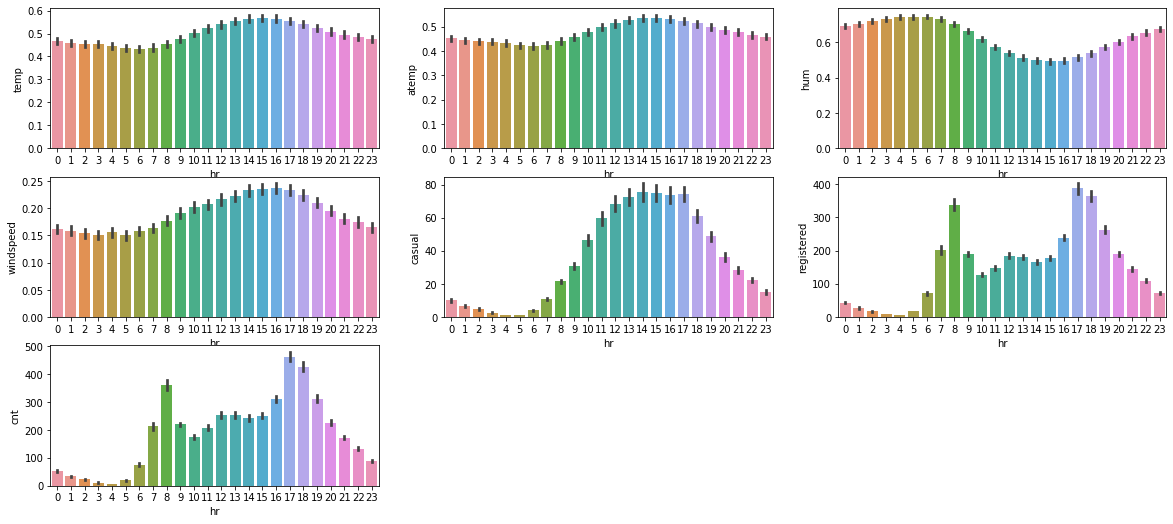

In [14]:
# creating bar plot of colums with respect to hour to check distribution among hour
hr = bs[['hr','temp','atemp','hum','windspeed','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(hr.columns):
    if column == 'hr':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='hr', y=column, data=hr)

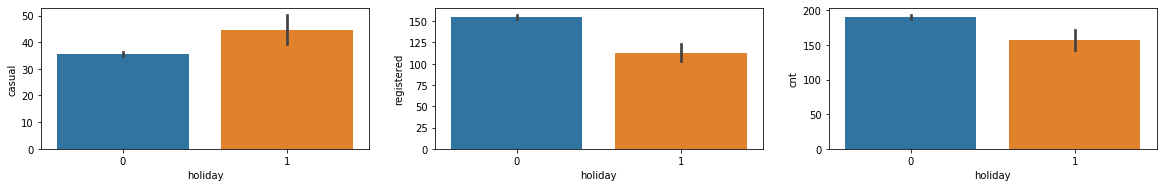

In [15]:
# creating bar plot of colums with respect to holiday to check distribution among holiday
holiday = bs[['holiday','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(holiday.columns):
    if column == 'holiday':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='holiday', y=column, data=holiday)

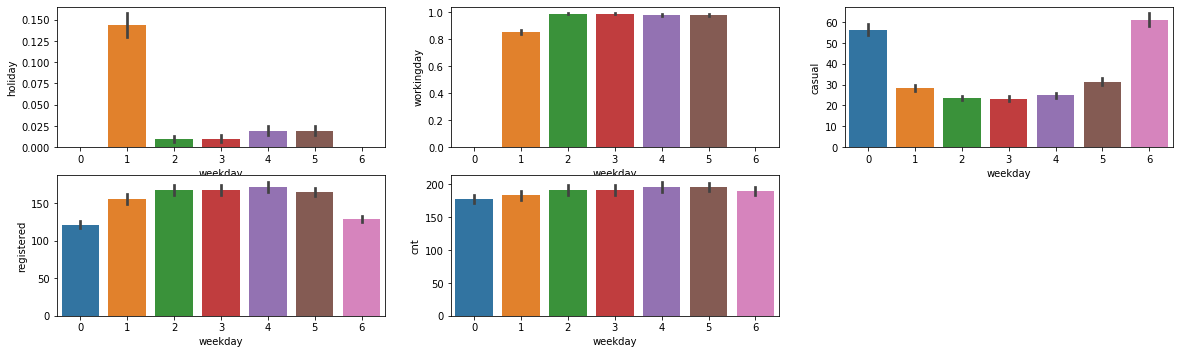

In [16]:
# creating bar plot of colums with respect to weekday to check distribution among weekday
weekday = bs[['weekday','holiday','workingday','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(weekday.columns):
    if column == 'weekday':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='weekday', y=column, data=weekday)

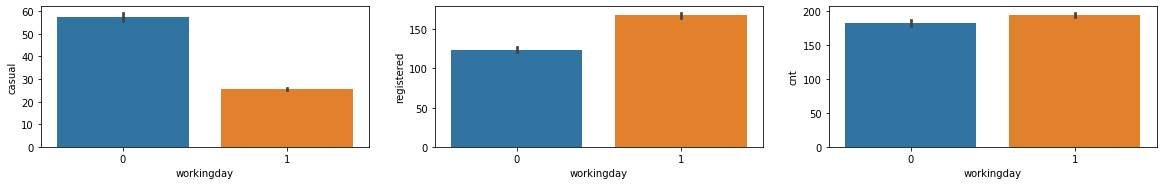

In [17]:
# creating bar plot of colums with respect to workingday to check distribution among workingday
workingday = bs[['workingday','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(workingday.columns):
    if column == 'workingday':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='workingday', y=column, data=workingday)

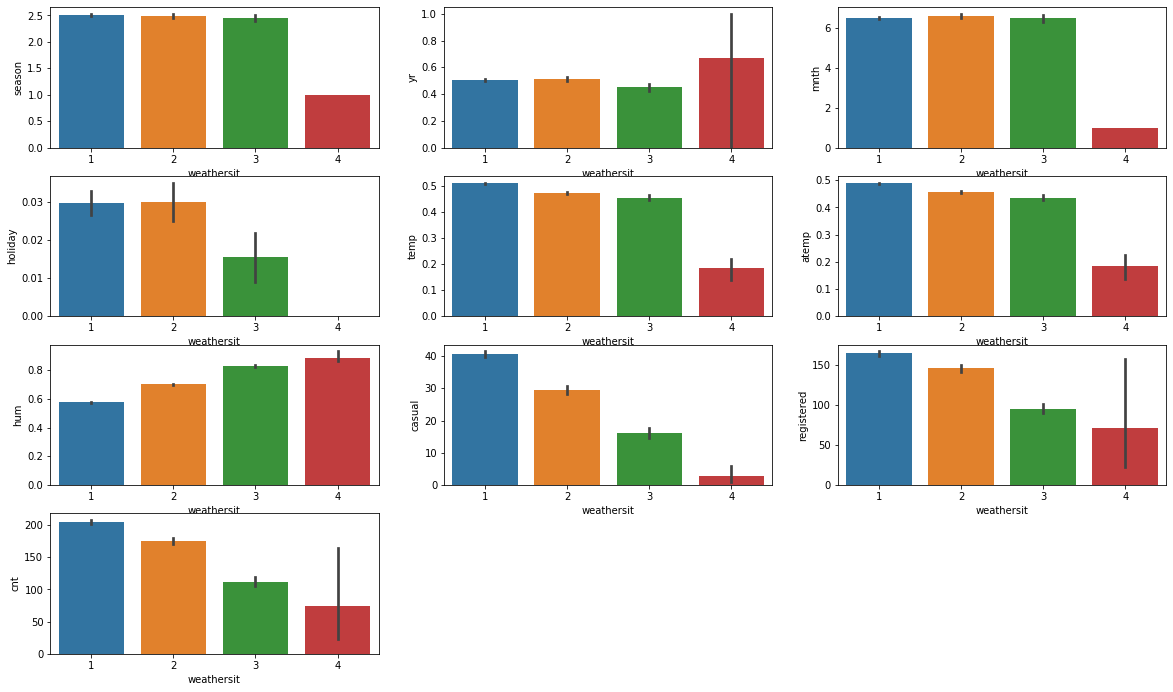

In [18]:
# creating bar plot of colums with respect to weathersit to check distribution among weathersit
weathersit = bs[['weathersit','season','yr','mnth','holiday','temp','atemp','hum','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(weathersit.columns):
    if column == 'weathersit':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='weathersit', y=column, data=weathersit)

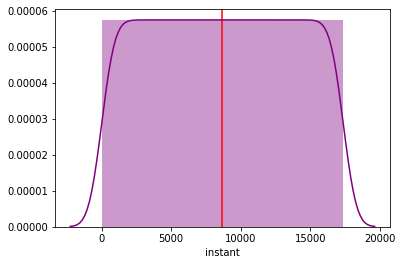

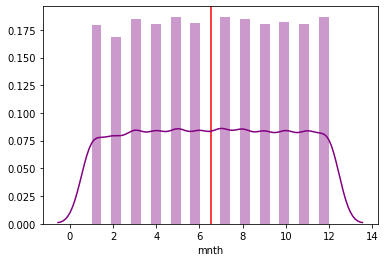

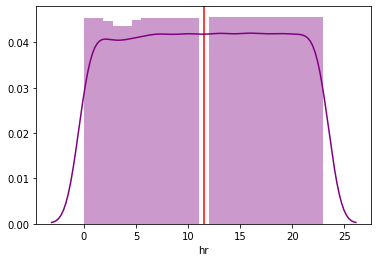

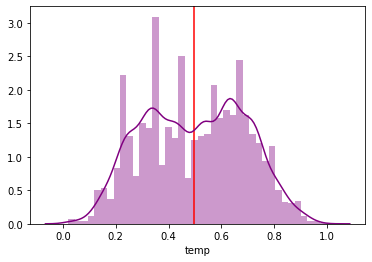

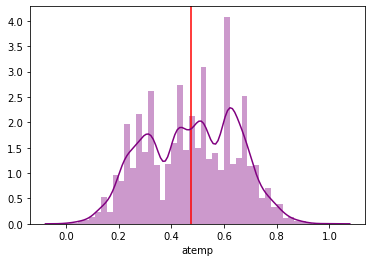

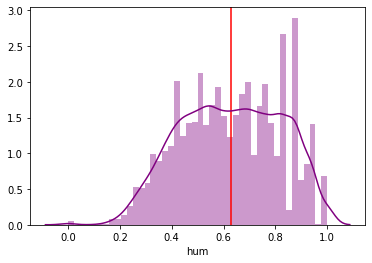

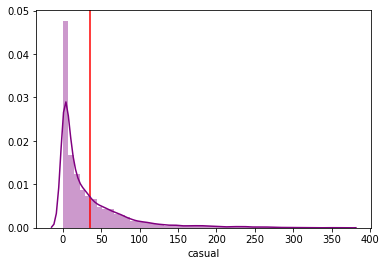

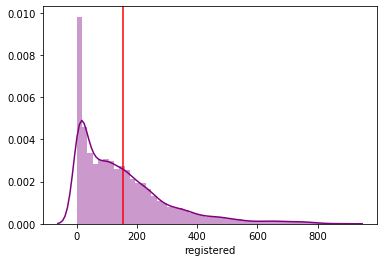

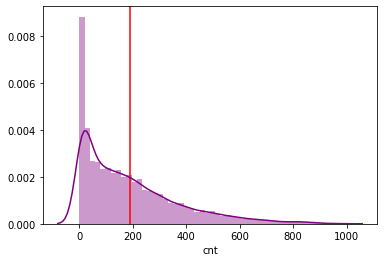

In [19]:
# Histogram - Distribution plot for all continous variables to visualize skewness
dist = bs[['instant','mnth','hr','temp','atemp','hum','casual','registered','cnt']]
for i,col in enumerate(dist):
    plt.figure(i)
    plt.axvline(dist[col].mean(),color = 'r')
    sns.distplot(dist[col],color='purple')

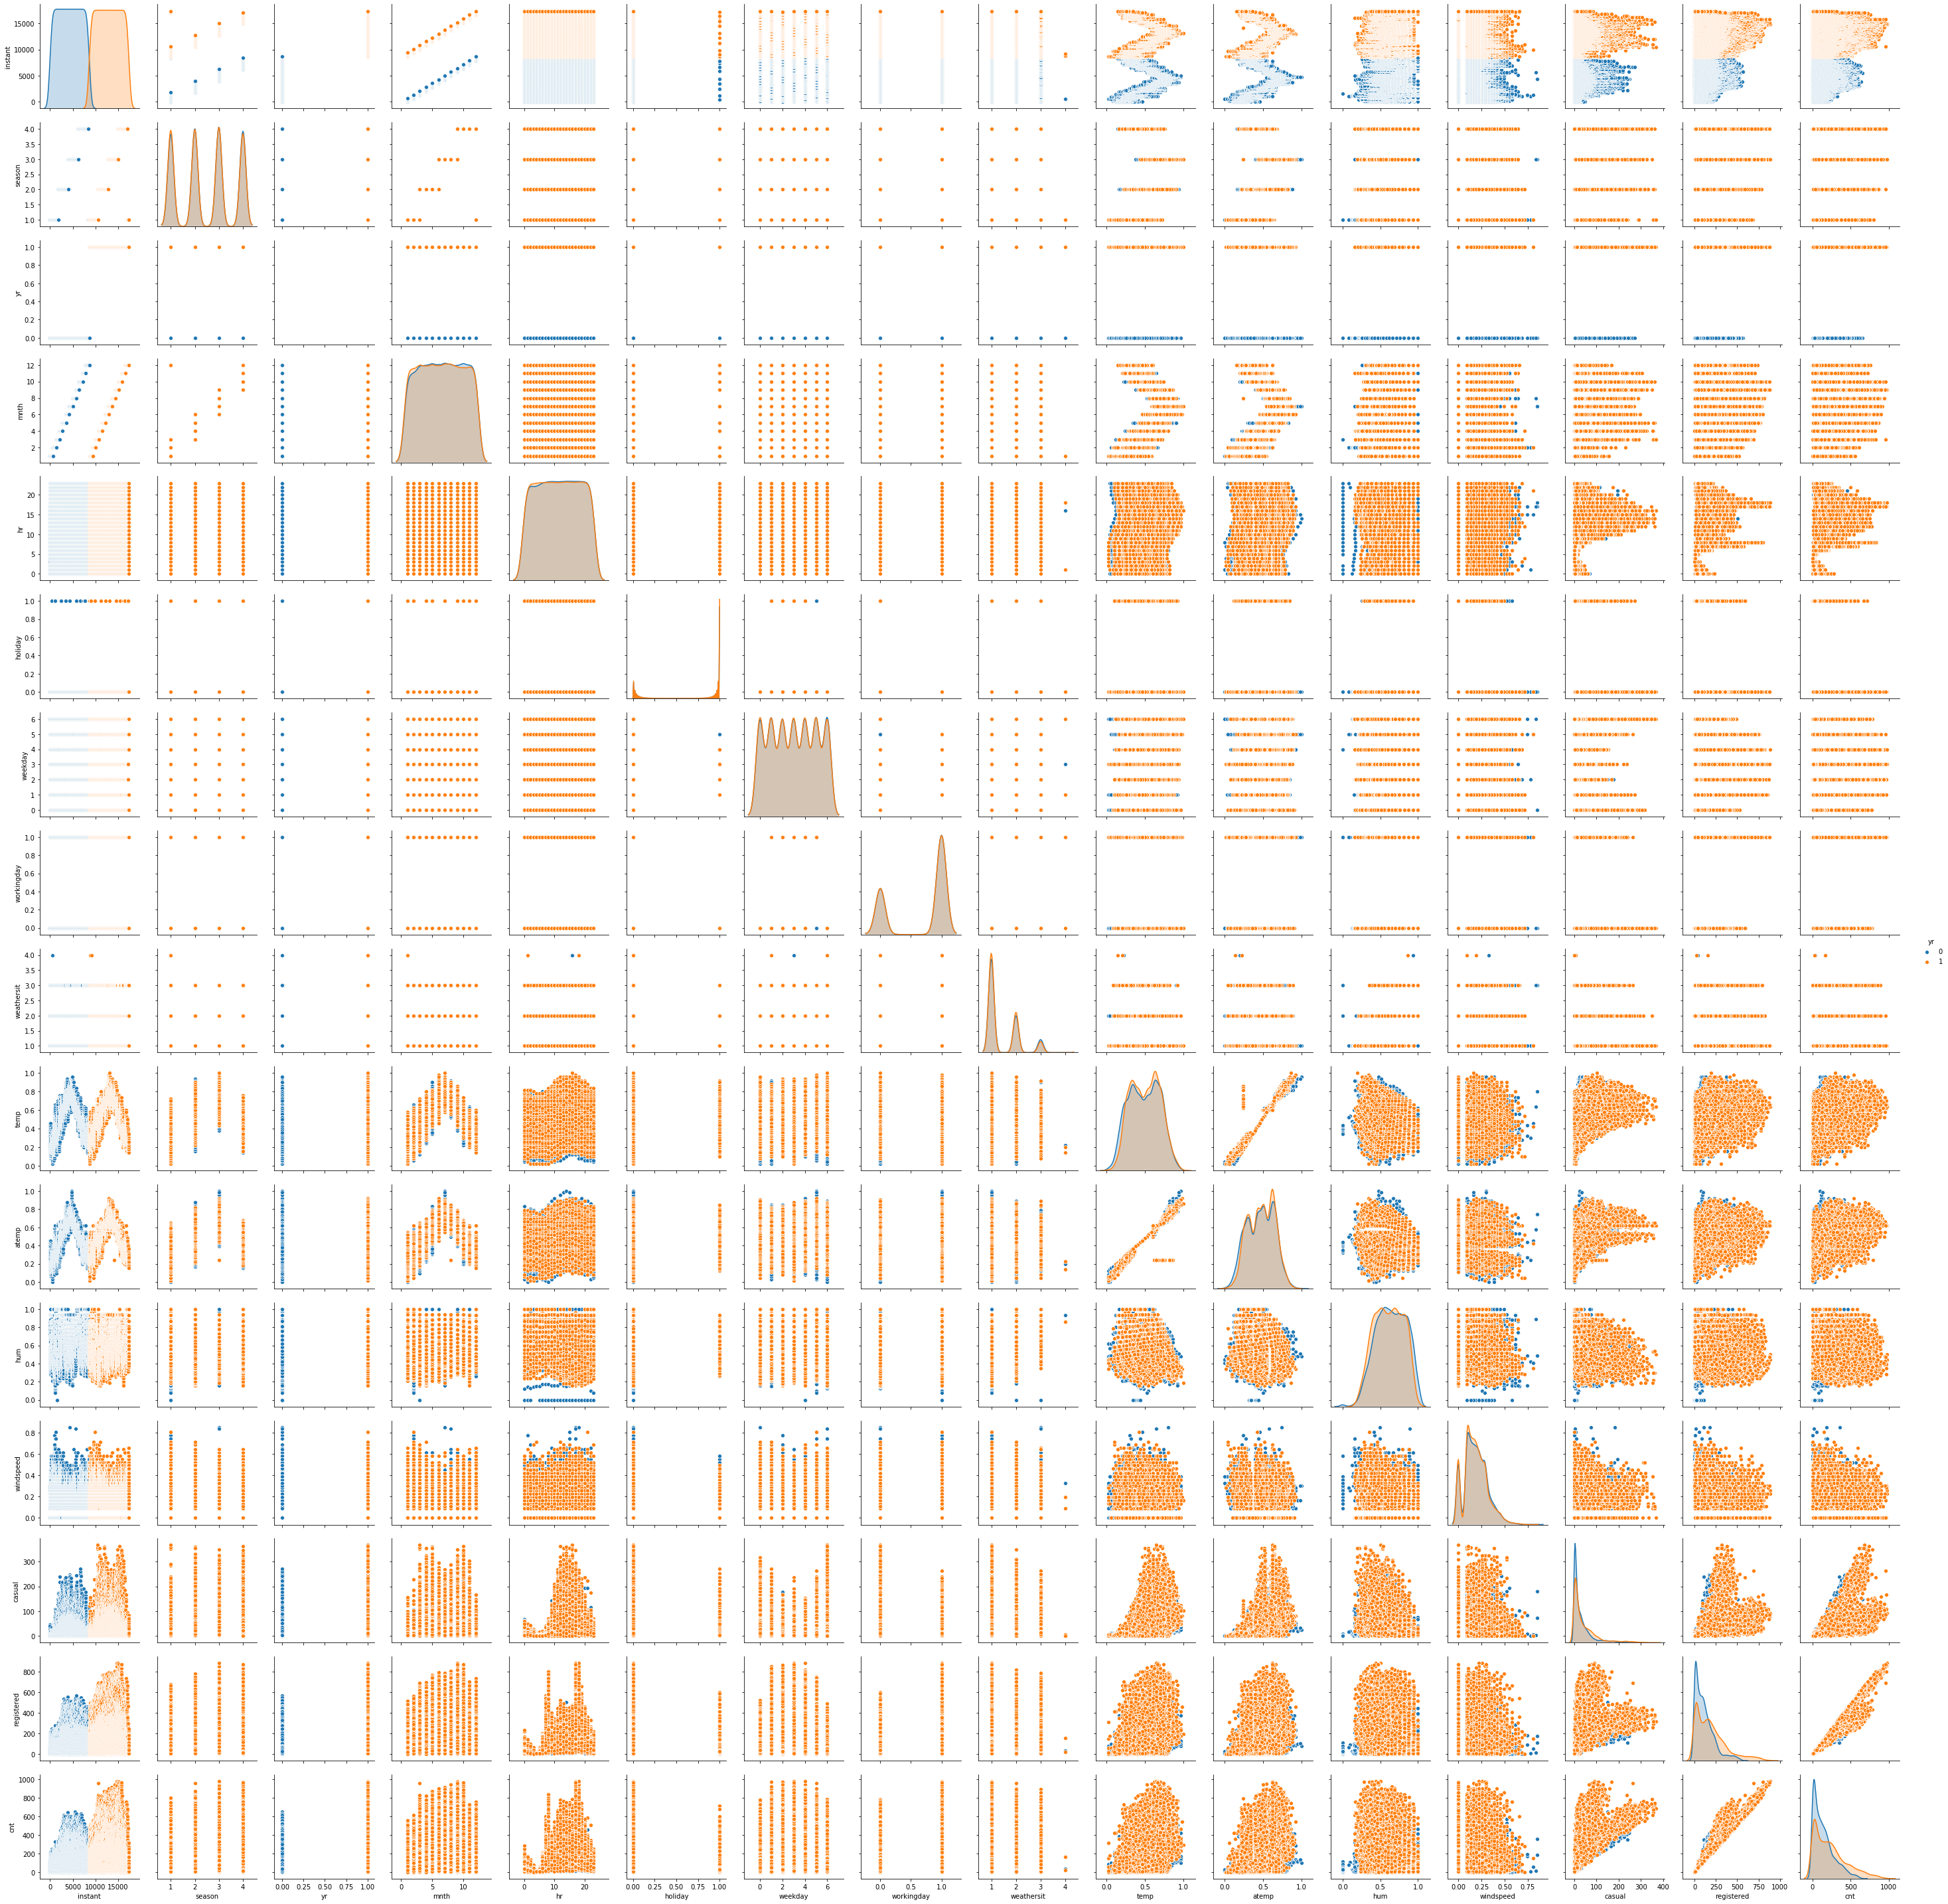

In [20]:
# pair plot to see the scatter of data using year as hue for clear understanding
sns.pairplot(bs, hue='yr')

In [21]:
#dropping date table since this can not be used because of its data type
bs=bs.drop(['dteday'], axis=1)

instant          AxesSubplot(0.125,0.772143;0.227941x0.107857)
season        AxesSubplot(0.398529,0.772143;0.227941x0.107857)
yr            AxesSubplot(0.672059,0.772143;0.227941x0.107857)
mnth             AxesSubplot(0.125,0.642714;0.227941x0.107857)
hr            AxesSubplot(0.398529,0.642714;0.227941x0.107857)
holiday       AxesSubplot(0.672059,0.642714;0.227941x0.107857)
weekday          AxesSubplot(0.125,0.513286;0.227941x0.107857)
workingday    AxesSubplot(0.398529,0.513286;0.227941x0.107857)
weathersit    AxesSubplot(0.672059,0.513286;0.227941x0.107857)
temp             AxesSubplot(0.125,0.383857;0.227941x0.107857)
atemp         AxesSubplot(0.398529,0.383857;0.227941x0.107857)
hum           AxesSubplot(0.672059,0.383857;0.227941x0.107857)
windspeed        AxesSubplot(0.125,0.254429;0.227941x0.107857)
casual        AxesSubplot(0.398529,0.254429;0.227941x0.107857)
registered    AxesSubplot(0.672059,0.254429;0.227941x0.107857)
cnt                 AxesSubplot(0.125,0.125;0.227941x0.

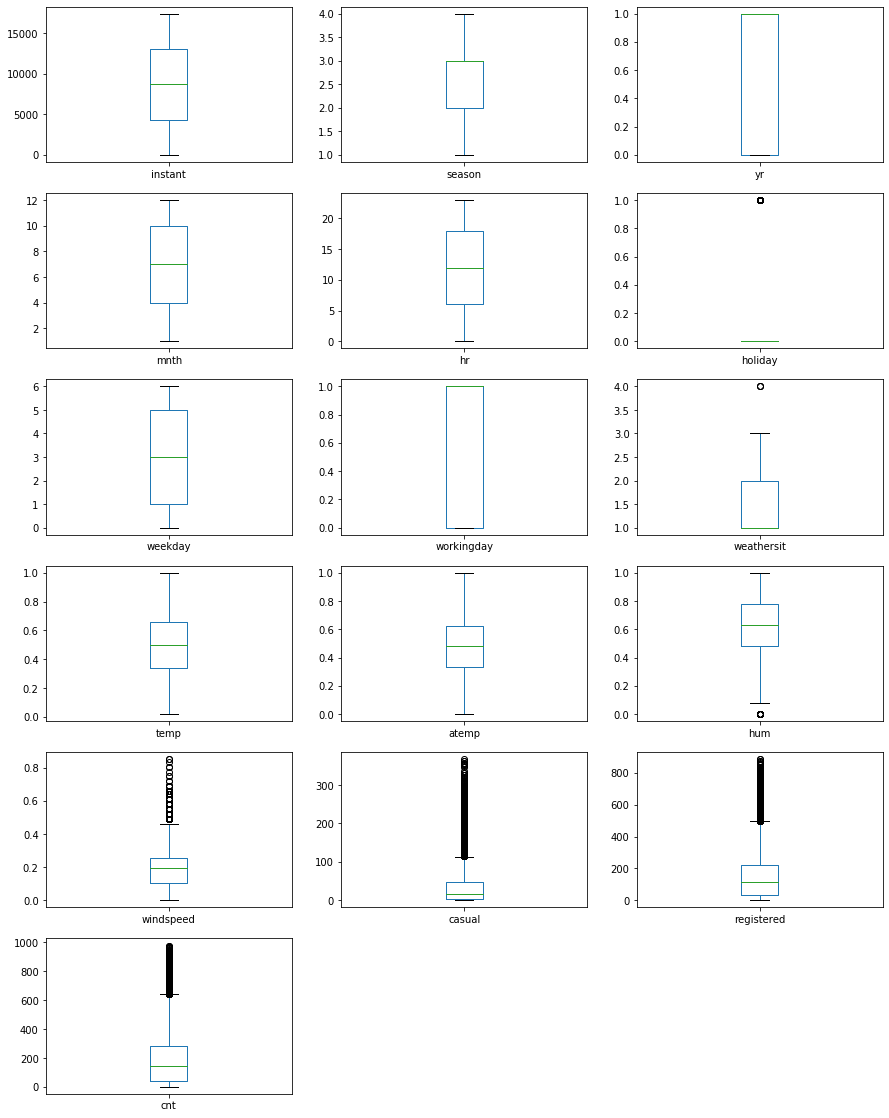

In [22]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
bs.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

In [23]:
#checking skewness
bs.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [24]:
#removing skewness
for col in bs.columns:
    if bs.skew().loc[col]>0.55:
        bs[col]=np.cbrt(bs[col])

for col in bs.columns:
    if bs.skew().loc[col]<-0.55:
        bs[col]=np.power(bs[col],2)
bs.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    0.990775
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed    -0.319377
casual        0.199738
registered   -0.052373
cnt          -0.083176
dtype: float64

In [25]:
#removing outlires
z=abs(zscore(bs))
print(bs.shape)
bs=bs.loc[(z<3).all(axis=1)]
print(bs.shape)

(17379, 16)
(16835, 16)


In [26]:
# dividing dataset into input values 'x' and output value 'y'
x=bs.iloc[:,0:-1]
print('x dataset\n',x.head(),'\n')
y=bs.iloc[:,-1]
print('y datase\n',y.head())

x dataset
    instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   0     1   0      0.0        6           0         1.0   
1        2       1   0     1   1      0.0        6           0         1.0   
2        3       1   0     1   2      0.0        6           0         1.0   
3        4       1   0     1   3      0.0        6           0         1.0   
4        5       1   0     1   4      0.0        6           0         1.0   

   temp   atemp   hum  windspeed    casual  registered  
0  0.24  0.2879  0.81        0.0  1.442250    2.351335  
1  0.22  0.2727  0.80        0.0  2.000000    3.174802  
2  0.22  0.2727  0.80        0.0  1.709976    3.000000  
3  0.24  0.2879  0.75        0.0  1.442250    2.154435  
4  0.24  0.2879  0.75        0.0  0.000000    1.000000   

y datase
 0    2.519842
1    3.419952
2    3.174802
3    2.351335
4    1.000000
Name: cnt, dtype: float64


In [27]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [28]:
#creating models array with all the model, along with few blank array for further use
Model_array=[]
Random_state=[]
Max_r2score_array=[]
Cross_val_score_array=[]
Standard_Deviation=[]
Models=[('Ridge',Ridge()),('Lasso',Lasso()),('ElasticNet',ElasticNet()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('SGDRegressor',SGDRegressor()),('LinearRegression',LinearRegression()),('KNeighborsRegressor',KNeighborsRegressor())]

In [29]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [30]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf)
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [31]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
3,RandomForestRegressor,0.999936,62
5,LinearRegression,0.997896,11
0,Ridge,0.997895,11
4,SGDRegressor,0.997857,11
6,KNeighborsRegressor,0.958152,32
2,ElasticNet,0.802122,12
1,Lasso,0.741397,56


In [32]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
3,RandomForestRegressor,0.999856,0.000072
0,Ridge,0.996902,0.001433
5,LinearRegression,0.996902,0.001432
4,SGDRegressor,0.996897,0.001424
6,KNeighborsRegressor,0.927188,0.030023
2,ElasticNet,0.761442,0.061117
1,Lasso,0.683576,0.095501


### Since R2 score obtained by RandomForestRegressor is 0.999936 and mean of cross val accuracy is RandomForestRegressor 0.999856.

It is quite evident that the diffrence is least between r2 score and cross val score for this model, which prove that model is perfect fit.

In [33]:
rfr=RandomForestRegressor(random_state=5)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=62,shuffle=True)
rfr.fit(train_x,train_y)
pred=rfr.predict(test_x)
score=cross_val_score(rfr,train_x,train_y,cv=14).mean()

print('Model score',rfr.score(train_x,train_y),'\n')
print('R2 score of model is :' ,r2_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score,'\n')
#print('Model cofficient\n',rfr.coef_,'\n')
#print('Model intercept',rfr.intercept_,'\n')
print('Mean absolute error for model is : ',mean_absolute_error(test_y,pred),'\n')
print('Mean squared error for model is : ',mean_squared_error(test_y,pred),'\n')
print('Root mean squared error for model is : ',np.sqrt(mean_squared_error(test_y,pred)),'\n')

Model score 0.9999742273002483 

R2 score of model is : 0.9999359359665382 

The mean of cross_val_score for the model is: 0.9998845608055476 

Mean absolute error for model is :  0.010124309201662088 

Mean squared error for model is :  0.00026872186643285843 

Root mean squared error for model is :  0.016392738222544105 



In [34]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 4 Bike Sharing.csv')

In [35]:
# saving the model using pickle.
joblib.dump(rfr,'rfr_Project 4 Bike Sharing.pkl')

['rfr_Project 4 Bike Sharing.pkl']